###  print out structures

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mycrograd.engine import Value
from mycrograd.nn import Neuron, Layer, MLP
from drawviz import draw_dot
np.random.seed(1337)
random.seed(1337)

#### Value

Value(data=4.5, grad=0)


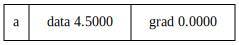

In [3]:
a=Value(4.5,label='a')
print(a)
draw_dot(a)

#### Neuron

number of inputs:  5
Neuron:  ReLUNeuron(5)
weights:  [Value(data=0.3582002209547388, grad=0), Value(data=0.9042806512794279, grad=0), Value(data=-0.8816062876600146, grad=0), Value(data=0.10041983326299175, grad=0), Value(data=-0.7698683314750423, grad=0)]
b:  Value(data=0, grad=0)
b label:  b
number of parameters  6
[Value(data=0.3582002209547388, grad=0), Value(data=0.9042806512794279, grad=0), Value(data=-0.8816062876600146, grad=0), Value(data=0.10041983326299175, grad=0), Value(data=-0.7698683314750423, grad=0), Value(data=0, grad=0)]
inputs  [8 4 2 4 4]
activation:  Value(data=2.0417178045873907, grad=0)


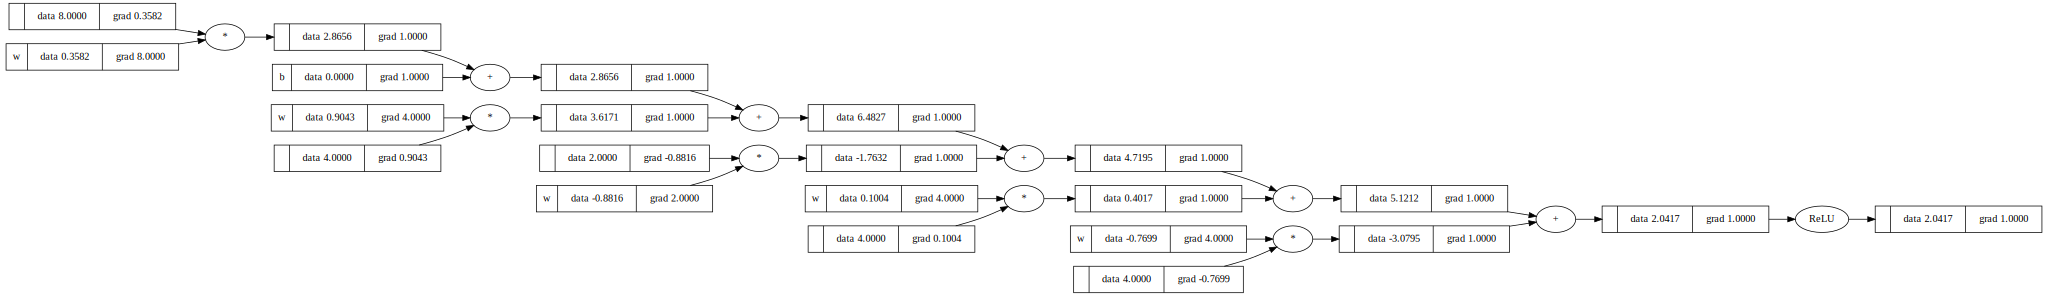

In [17]:
nin=5  #number of inputs
myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b label: ",myNeuron.b.label)

print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())
# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
print("activation: ",myNeuron(xi))
loss=myNeuron(xi)
loss.backward()
draw_dot(loss)



#### Layer

In [10]:
nin=4  #number of inputs
myLayer=Layer(nin,7)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)

for neuron in myLayer.neurons:
    print("Neuron: ",neuron)


Layer:  Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)]
Neurons:  [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)]
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)


#### Multi Layer Perceptron

In [13]:
# initialize a model 
nin=5  #number of inputs
model = MLP(nin, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
print("activation: ",model(xi))


MLP of [Layer of [ReLUNeuron(5), ReLUNeuron(5), ReLUNeuron(5), ReLUNeuron(5)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 49
inputs  [9 7 7 8 9]
activation:  Value(data=11.026082660786756, grad=0)


## Gradient

[Value(data=-0.05383238577004734, grad=0), Value(data=0, grad=0)]
weights:  [Value(data=-0.05383238577004734, grad=0)]
[Value(data=-0.6116507489401757, grad=0), Value(data=0, grad=0)]
loss= Value(data=0.032926619073485916, grad=0)


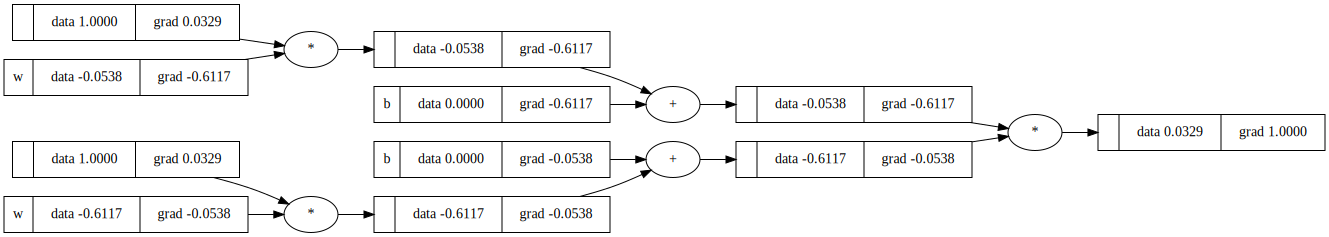

In [14]:
myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("loss=",loss)

draw_dot(loss)
loss.backward()
draw_dot(loss)
